# Inactive Unit Analysis: Example

This notebook demonstrates how to run [IUA](https://apple.github.io/deepview/api/deepview/introspectors.html#deepview.introspectors.IUA) on a simple dataset. For more general information about how to use DeepView and about each of these steps, it's suggested to start with the How-To guides in the docs (starting with how to [load a model](https://apple.github.io/deepview/how_to/connect_model.html)), and then checking out the [Familiarity Notebook for Rare Data and Data Errors](../data_introspection/familiarity_for_rare_data_discovery.ipynb).

## 1. Use DeepView to run inference

Let us start by importing everything needed to run on this notebook.

In [1]:
from deepview.base import pipeline, ResponseInfo
from deepview.introspectors import IUA
from deepview.samples import StubImageDataset
from deepview.processors import FieldRenamer, Transposer
from deepview.exceptions import enable_deprecation_warnings

enable_deprecation_warnings(error=True)  # treat DeepView deprecation warnings as errors

from deepview_tensorflow import load_tf_model_from_path

2024-11-28 07:49:59.212361: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-28 07:49:59.231881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 07:49:59.231897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 07:49:59.232437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 07:49:59.235892: I tensorflow/core/platform/cpu_feature_guar

### Download a model, MobileNet, and store it locally

In [2]:
from deepview_tensorflow import TFModelExamples

mobilenet = TFModelExamples.MobileNet()
model = mobilenet.model

2024-11-28 07:50:04.046656: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-28 07:50:04.071374: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-28 07:50:04.072796: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

/home/satish/miniforge3/envs/betterwithdata/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Create a Producer to generate data


In [3]:
data_producer = StubImageDataset(
    dataset_size=32,
    image_width=224,
    image_height=224,
    channel_count=3
)

### Find Convolutional Layers

In [4]:
conv2d_responses = [
    info.name
    for info in model.response_infos.values()
    if info.layer.kind is ResponseInfo.LayerKind.CONV_2D
]

### Set up processing pipeline

In [5]:
response_producer = pipeline(
    data_producer,
    FieldRenamer({"images": "input_1:0"}),
    model(conv2d_responses),
    Transposer(dim=(0, 3, 1, 2))
)

## 2. Execute IUA introspector

Which can be done with just a single line of code!

In [6]:
iua = IUA.introspect(response_producer)

2024-11-28 07:50:14.174949: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


### Show table of results

`IUA.show(iua)` will show, by default, a table of layers and the discovered inactive units.

In [7]:
print(IUA.show(iua).head())

     response  mean inactive  std inactive
0       conv1   100352.62500      0.856957
1   conv_dw_1    87842.37500      7.753024
2  conv_dw_10    23196.15625    308.874075
3  conv_dw_11    25696.81250    373.478366
4  conv_dw_12    10771.53125    119.305800


### Plot results

`IUA.show` can also be used to view charts, by setting `vis_type` to `IUA.VisType.CHART`.

One layer's chart can be viewed in this manner, e.g. `conv_pw_9`...

<Axes: title={'center': 'conv_pw_9 Inactive Unit Proportions '}>

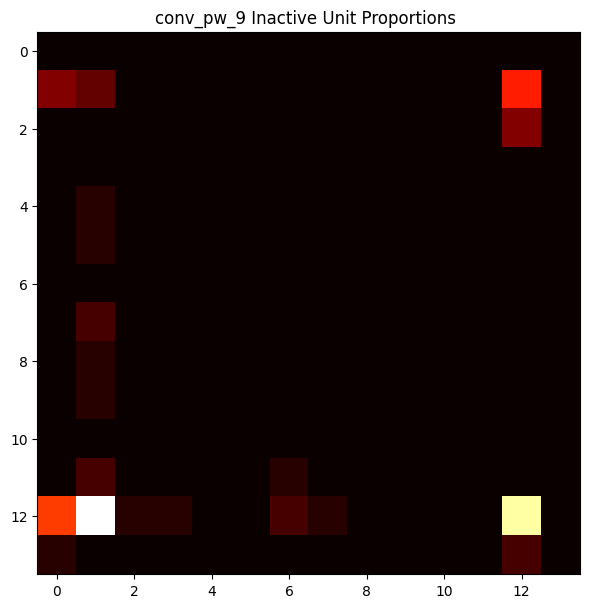

In [8]:
IUA.show(iua, vis_type=IUA.VisType.CHART, response_names=['conv_pw_9'])

... or view all responses' charts (omitting the `response_names` parameter):

array([<Axes: title={'center': 'conv1 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_1 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_10 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_11 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_12 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_13 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_2 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_3 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_4 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_5 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_6 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_7 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_8 Inactive Unit Proportions '}>,
       <Axes: title={'center': 'conv_dw_9 Inactive 

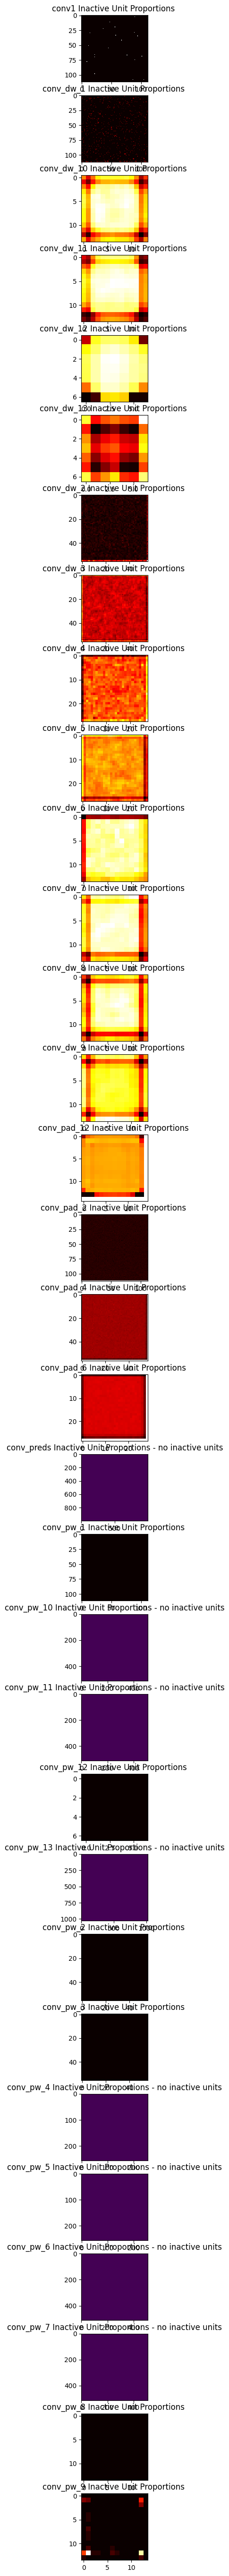

In [9]:
IUA.show(iua, vis_type=IUA.VisType.CHART)